In [1]:
import pandas as pd
df=pd.read_csv("dataset.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
x=df.drop(columns=['target'],axis=0)
y=df["target"]

In [20]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=42)

In [22]:
x_train.shape,x_test.shape

((212, 13), (91, 13))

In [19]:
num=list(x.columns)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe=Pipeline(steps=[("simpleimputer",SimpleImputer(strategy="constant",fill_value=0)),("robustscaler",RobustScaler()),("standardscaler",StandardScaler())])
preprocessor=ColumnTransformer([("pipe",pipe,num)])
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [83]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parm={"max_depth":[3,5,10,None],"criterion":["gini","entropy"]}
model=RandomForestClassifier()
model1= RandomizedSearchCV(model, param_distributions=parm,scoring="accuracy",cv=10)
model1.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None]},
                   scoring='accuracy')

In [54]:
y_pred=model1.predict(x_test)

In [55]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.8021978021978022


In [56]:
print("precision:",precision_score(y_test,y_pred))

precision: 0.82


In [57]:
print("recall_score:",recall_score(y_test,y_pred))

recall_score: 0.82


In [51]:
print("f1_score:",f1_score(y_test,y_pred))

f1_score: 0.8431372549019608


Text(0, 0.5, 'ST depression induced by exercise relative to rest')

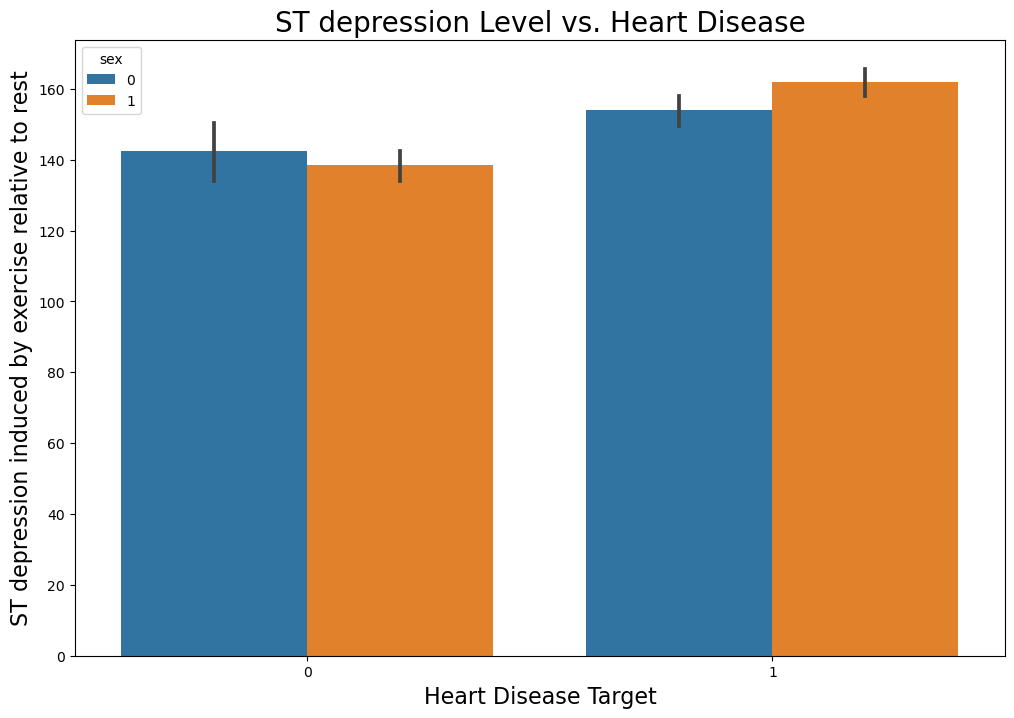

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x= 'target', y= 'thalach',hue="sex", data=df)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [84]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parm={"max_depth":[3,5,10,None],"min_samples_split":[2,3,4,5], "min_samples_leaf":[1,2,3,4],"criterion":["gini","entropy"]}
model=RandomForestClassifier()
model1= RandomizedSearchCV(model, param_distributions=parm,scoring="accuracy",cv=5)
model1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring='accuracy')

In [65]:
model1.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'criterion': 'entropy'}

In [72]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parm={"max_depth":[3,5,10,None],"criterion":["gini","entropy"]}
model=RandomForestClassifier()
model1= RandomizedSearchCV(model, param_distributions=parm,scoring="accuracy",cv=10)
model1.fit(x_train,y_train)
model1.best_params_

{'max_depth': 10, 'criterion': 'entropy'}

In [74]:
model=RandomForestClassifier(max_depth= 10, criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [75]:
model.feature_importances_

array([0.0926838 , 0.03828076, 0.09683271, 0.07915142, 0.08123954,
       0.01367204, 0.01553837, 0.11688407, 0.07089898, 0.11008152,
       0.04594259, 0.13800292, 0.10079127])

In [76]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


<AxesSubplot: xlabel='thal', ylabel='oldpeak'>

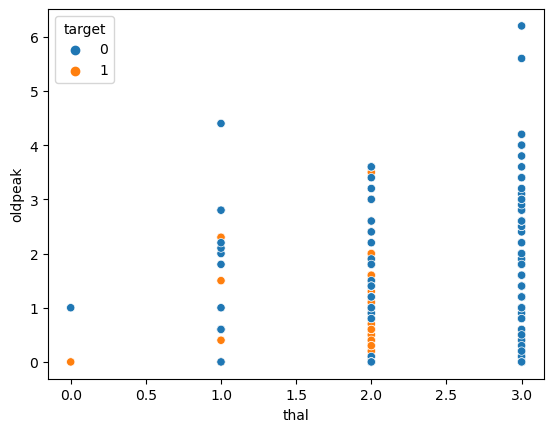

In [82]:
sns.scatterplot(x=df["thal"], y=df["oldpeak"], hue=df['target'], data=df)